# An Introduction to Neural Networks
--------
# 01 - Python for Machine Learning

Nesse primeiro tutorial iremos nos familiar com a utilização da linguagem de programação **Python 3** para **Machine Learning**.  

Mais específicamente, iremos aprender como manipular grandes conjuntos de dados utilizando a biblioteca [Pandas](https://pandas.pydata.org/), como realizar complexas operações matemáticas utilizando a biblioteca [Numpy](http://www.numpy.org/) e, por fim, como criar visualizações intuitivas utilizando a biblioteca [Matplotlib](https://matplotlib.org/).


### Sumário
* [Parte 1 - Manipulação de Dados](#Parte-1---Representa%C3%A7%C3%A3o-de-Dados)
* [Parte 2 - Operações Matemáticas](#Parte-2---Operações-Matemáticas)
* [Parte 3 - Visualização de Dados](#Parte-3---Visualização-de-Dados)


### Bibliotecas

In [1]:
import pandas as pd                 # Representação e Manipulação dos Dados
import numpy as np                  # Operações Matriciais e Complexas
import matplotlib.pyplot as plt     # Visualização de Dados

# Essa linha abaixo é apenas para que os 
# plots sejam gerados logo abaixo da célula de código
%matplotlib inline

---
## Parte 1 - Representação de Dados

Em todos os algoritmos de Machine Learning, nossos modelos serão treinados através de uma alimentação de dados.
    
Na forma mais comum, os dados são estruturados em Tabelas. Regularmente, esses dados estão armazenados em arquivos onde cada arquivo referente a um fenômeno trás uma observação por cada linha, e para cada observação um conjunto de atributos dispostos nas colunas. Em _Aprendizagem Supervisionada_, a última coluna costuma representar o "output" do modelo para cada observação (no caso de Classificação, a última coluna indica a qual "classe" a observação pertence).

A biblioteca **Pandas** é uma ferramenta ótima para carregar, manipular, processar e representar grandes conjuntos de dados. As células abaixo demonstram diversas formas de utilização das funções dessa bibliotecas para carregar e manipular um conjunto de dados armazenado em um arquivo do tipo CSV. 

Para mais informações, consulte a [documentação dessa biblioteca](http://pandas.pydata.org/pandas-docs/stable/).

In [2]:
## CARREGANDO OS DADOS ATRAVÉS DE UM ARQUIVO ##
data = pd.read_csv('datasets/iris.csv')

data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
## ACESSANDO E MANIPULANDO OS DADOS ##
# Indexação por posição: dataframe.iloc[<Linha>, <Coluna>]
data.iloc[0,0]             # Acessando o elemento [0, 0]
data.iloc[:,0]             # Acessando os elementos da coluna [0] de todas as linhas
data.iloc[1,0]             # Acessando os elementos da linha [1] de todas as colunas
data.iloc[:,-1]            # Acessando a última coluna de todas as linhas
data.iloc[-1,3]            # Acessando a ultima linha e coluna 3
data.iloc[10:20,:]         # Slice: Acessando todas as colunas de todas as linhas entre 10 e 20
data.iloc[135:, :]         # Slice: Acessando todas as colunas da 135ª linha até a última
data.iloc[:10,2:4]         # Slice: Acessando da coluna 2 até a 4 da primeira até a 10ª linha
data.iloc[-10:, :]         # Slice: Acessando todas as colunas das 10 últimas linhas
data.iloc[[2,7,28], :]     # Slice: Acessando todas as colunas dos elementos nas linhas [2,7,28]
# E aí por diante...

# Indexação por índice/atributo: dataframe.loc[<Índice>, <Atributo>]
data.loc[0, "Class"]                     # Acesando a coluna "Class" do elemento de índice "0"
data.loc[0:10, "Petal Length":"Class"]   # Slice: Acessando os índices de 0 a 10, nas colunas "Petal Length" a "Class"

# Indexação por condição: dataframe[<Teste Condicional>]
data[data["Class"] == "Iris-setosa"]
data[data["Class"] == "Iris-setosa"].iloc[-5:, :-1]

,Sepal Length,Sepal Width,Petal Length,Petal Width
45,4.8,3.0,1.4,0.3
46,5.1,3.8,1.6,0.2
47,4.6,3.2,1.4,0.2
48,5.3,3.7,1.5,0.2
49,5.0,3.3,1.4,0.2


In [4]:
## PRÉ-PROCESSAMENTO DOS DADOS ##
# Armazenando as dimensões dos dados
m = data.shape[0]
n = data.shape[1]-1

# Transformando as Classes em Números
data["Class"] = data["Class"].astype('category').cat.codes

# Separação do Conjunto de Treino e Conjunto de Teste
np.random.seed(10) # Essa função fixa a aleatoriadade pra a gente poder visualizar melhor :P

trainingSize = int(0.8 * m)
indexes = np.random.randint(0, m, m)

trainData = data.iloc[indexes[:trainingSize]]
testData = data.iloc[indexes[trainingSize:]]

# Obtendo matrizes (formato Numpy) correspondentes
X_train = trainData.iloc[:,:-1].values
y_train = trainData.iloc[:, -1].values

X_test = testData.iloc[:,:-1].values
y_test = testData.iloc[:, -1].values

---
## Parte 2 - Operações Matemáticas

Como estamos trabalhando com conjuntos de dados tabulares, podemos representá-los como matrizes (como visto na célula anterior) e então utilizarmos de técnicas de álgebra linear para processar os dados e implementar os algoritmos desejados. Na realidade, a álgebra linear é uma das ciências que fundamentam toda a área de Machine Learning.
    
Apesar de que um conhecimento teórico mais profundo (Espaços Vetoriais, Propriedades Matriciais, etc...) é extremamente desejável, este mini-curso apenas irá exigir que você conheça algumas operações matrizes/vetores.

**Soma/Subtração de Matrizes**: sejam duas matrizes $\mathbf{X}$ e $\mathbf{Y}$, de mesma dimensão (condição necessária!), a soma $\mathbf{X} + \mathbf{Y}$ é computada como:

$$
    \begin{bmatrix}
     X_{11} & X_{12} \\ 
     X_{21} & X_{22}  
    \end{bmatrix} + \begin{bmatrix}
     Y_{11} & Y_{12} \\ 
     Y_{21} & Y_{22}  
    \end{bmatrix} = \begin{bmatrix}
     X_{11}+Y_{11} & X_{12}+X_{12} \\ 
     X_{21}+X_{21} & X_{22}+X_{22}  
    \end{bmatrix}
$$

**Multiplicação por Escalar**: seja um número escalar $c$ e uma matriz qualquer $\mathbf{X}$, a multiplicação $c  \mathbf{X}$ é computada como:

$$
    c  \times  \begin{bmatrix}
     X_{11} & X_{12} \\ 
     X_{21} & X_{22}  
    \end{bmatrix} = \begin{bmatrix}
     c \times X_{11} & c \times X_{12} \\ 
     c \times X_{21} & c \times X_{22}  
    \end{bmatrix}
$$

**Multiplicação Element-Wise**: sejam duas matrizes $\mathbf{X}$ e $\mathbf{Y}$, de mesma dimensão (condição necessária!), a multiplicação elemento-a-elemento $\mathbf{X}\ .\times \mathbf{Y}$ é computada como:

$$
    \begin{bmatrix}
     X_{11} & X_{12} \\ 
     X_{21} & X_{22}  
    \end{bmatrix} .\times \begin{bmatrix}
     Y_{11} & Y_{12} \\ 
     Y_{21} & Y_{22}  
    \end{bmatrix} = \begin{bmatrix}
     X_{11} \times Y_{11} & X_{12} \times Y_{12} \\ 
     X_{21} \times Y_{21} & X_{22} \times Y_{22}  
    \end{bmatrix}
$$

**Transposta**: a transposta de uma matriz qualquer **X**, representada por $\mathbf{X^T}$, é computada como:

$$
    \begin{bmatrix}
     X_{11} & X_{12} & X_{13} \\ 
     X_{21} & X_{22} & X_{23} \\
     X_{31} & X_{32} & X_{33}
    \end{bmatrix}^T =
     \begin{bmatrix}
     X_{11} & X_{21} & X_{31} \\ 
     X_{12} & X_{22} & X_{32} \\
     X_{13} & X_{23} & X_{33}
    \end{bmatrix}
$$

**Multiplicação Matricial**: sejam duas matrizes $\mathbf{X}$ e $\mathbf{Y}$, tal que o número de colunas da primeira matriz é igual ao número de linhas da segunda matriz (condição necessária!), a multiplicação $\mathbf{X} \times \mathbf{Y}$ é computada como:

$$
    \begin{bmatrix}
     X_{11} & X_{12} & X_{13} \\ 
     X_{21} & X_{22} & X_{23}
    \end{bmatrix} \times \begin{bmatrix}
     Y_{11} & Y_{12} \\ 
     Y_{21} & Y_{22} \\ 
     Y_{31} & Y_{32}
    \end{bmatrix} = \begin{bmatrix}
     X_{11} \times Y_{11} + X_{12} \times Y_{21} + X_{13} \times Y_{31} & X_{11} \times Y_{12} + X_{12} \times Y_{22} + X_{13} \times Y_{32} \\ 
     X_{21} \times Y_{11} + X_{22} \times Y_{21} + X_{23} \times Y_{31} & X_{21} \times Y_{12} + X_{22} \times Y_{22} + X_{23} \times Y_{32}
    \end{bmatrix}
$$

Todas estas operações (e muitas outras) já estão nativamente incorporadas na biblioteca **Numpy**, e funcionarão perfeitamente contanto que as variáveis utilizadas sejam justamente do tipo específico dessa biblioteca. Além disso, a bibilioteca também dispõe de outras dezenas de complexas operações matemáticas e computacionais, mas que não serão tratadas neste mini-curso.

Para mais informações, consulte a [documentação dessa biblioteca](https://docs.scipy.org/doc/numpy-1.14.5/reference/).

In [5]:
## OPERAÇÕES MATRICIAIS COM O NUMPY ##
## Criando matrizes no Numpy:
A = np.array([[1,  3, 7],
              [5, -2, 0]])
B = np.array([[-3, 4,  1],
              [10, 0, -1]])

print("Matriz A:\n", A, "\nDimensões:", A.shape)
print()
print("Matriz B:\n", B, "\nDimensões:", B.shape)
print("\n---\n")

## Soma/Subtração de Matrizes
print("A + B:\n", (A + B))
print()
print("A - B:\n", (A - B))
print("\n---\n")

## Multiplicação por Escalar
print("5*A:\n", (5 * A))
print()
print("-B:\n", (-B))
print()
print("\n---\n")

## Multiplicação element-wise de Matrizes (.*)
# Obs.: O operador comum de multiplicação, *, é automaticamente interpretado como o operador de multiplicação 
#       element-wise quando as matrizes possuem a mesma dimensão.
print("A .* B:\n", (A * B))
print("\n---\n")

## Transpostas
# Obs.: O numpy já automaticamente computa um atributo "T" para cada matriz que armazena sua transposta.
print("A^T:\n", A.T, "\nDimensões:", (A.T.shape))
print()
print("B^T:\n", B.T, "\nDimensões:", (B.T.shape))
print("\n---\n")

## Multiplicação Matricial
# Obs.: A função que implementa a multiplicação matricial no numpy é a "np.matmul"
# Obs.2: Note que precisamos utilizar a transposta de B para que as matrizes estejam na condição necessária.
print("A * B^T:\n", np.matmul(A, B.T))
print("Dimensões:", A.shape, "*", B.T.shape, " = ", "(",A.shape[0], ",", B.T.shape[1],")")
print("\n---\n")

Matriz A:
 [[ 1  3  7]
 [ 5 -2  0]] 
Dimensões: (2, 3)

Matriz B:
 [[-3  4  1]
 [10  0 -1]] 
Dimensões: (2, 3)

---

A + B:
 [[-2  7  8]
 [15 -2 -1]]

A - B:
 [[ 4 -1  6]
 [-5 -2  1]]

---

5*A:
 [[  5  15  35]
 [ 25 -10   0]]

-B:
 [[  3  -4  -1]
 [-10   0   1]]


---

A .* B:
 [[-3 12  7]
 [50  0  0]]

---

A^T:
 [[ 1  5]
 [ 3 -2]
 [ 7  0]] 
Dimensões: (3, 2)

B^T:
 [[-3 10]
 [ 4  0]
 [ 1 -1]] 
Dimensões: (3, 2)

---

A * B^T:
 [[ 16   3]
 [-23  50]]
Dimensões: (2, 3) * (3, 2)  =  ( 2 , 2 )

---



---
## Parte 3 - Visualização de Dados

Nossos algoritmos processam conjuntos de dados grandes com certa facilidade. Visualizar os resultados desse processamento, no entanto, pode não ser tão intuitivo a nós, meros humanos.  

Dessa forma, sempre que estamos trabalhando com dados é importante dispor de ferramentas que permitam uma rápida e clara visualização dos resultados de qualquer processamento/manipulação realizada, para que possamos avaliar e interpretar aquilo que os algoritmos estão produzindo.

A biblioteca **Matplotlib** é equipada com um conjunto de ferramentas para plotar gráficos e permitir a visualização de grandes conjuntos de dados. Seu funcionamento é relativamente intuitivo, e bastante similar com quase todas as outras bibliotecas de visualização que existem.

Para mais informações, consulte a [secção de tutoriais da biblioteca](https://matplotlib.org/2.2.2/tutorials/index.html).

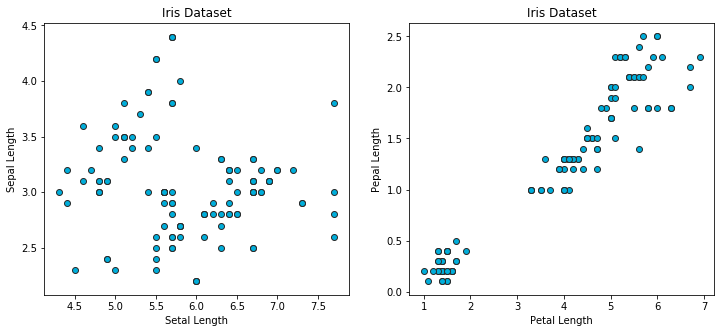

In [6]:
## VISUALIZAÇÃO NÃO-CONDICIONADA COM O MATPLOTLIB ##
# Obs.: A visualização não-condicionada se refere à plotagem realizada sem nenhum elemento que identifique a que 
#       classe pertence as observações. É utilizada, principalmente, para analisar a distribuição dos atributos.

plt.figure(figsize=[12,5])    # Cria uma figura com tamanho específico
    
plt.subplot(1,2,1)            # Divide a imagem em dois plots (1 linha e 2 colunas), e modifica o primeiro
plt.title("Iris Dataset")
plt.xlabel("Setal Length")
plt.ylabel("Sepal Length")

# A função "plt.scatter(X, Y)" plota pontos no espaço com as coordenadas X e Y (dois vetores de mesma dimensão)
plt.scatter(X_train[:,0], X_train[:,1], color="#00aedb", edgecolor="#2A2A2A")

plt.subplot(1,2,2)            # Divide a imagem em dois plots (1 linha e 2 colunas), e modifica o segundo
plt.title("Iris Dataset")
plt.xlabel("Petal Length")
plt.ylabel("Pepal Length")

# A função "plt.scatter(X, Y)" plota pontos no espaço com as coordenadas X e Y (dois vetores de mesma dimensão)
plt.scatter(X_train[:,2], X_train[:,3], color="#00aedb", edgecolor="#2A2A2A")

# Exibe a visualização resultante
plt.show()

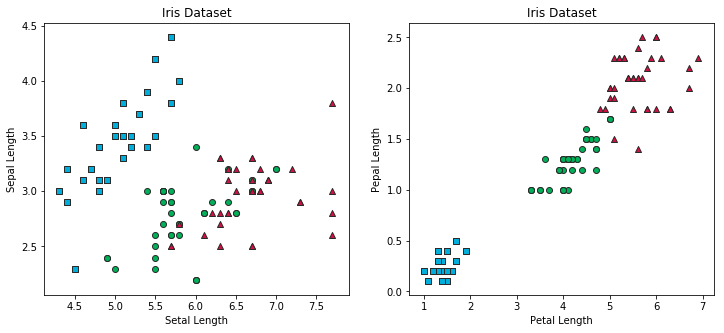

In [7]:
## VISUALIZAÇÃO CONDICIONADA COM O MATPLOTLIB E NUMPY ##
# Obs.: A visualização condicionada se refere à plotagem realizada com as observações identificadas por diferentes
#       formas e/ou cores. É utilizada, principalmente, para interpretar a distribuição das classes.

# Utilizamos a função "np.where()" do numpy para identificar os índices de cada classe
setosa = np.where(y_train == 0)
virginica = np.where(y_train == 1)
versicolor = np.where(y_train == 2)

plt.figure(figsize=[12,5])    # Cria uma figura com tamanho específico

plt.subplot(1,2,1)            # Divide a imagem em dois plots (1 linha e 2 colunas), e modifica o segundo
plt.title("Iris Dataset")
plt.xlabel("Setal Length")
plt.ylabel("Sepal Length")

# Dessa vez, utilizamos uma função "plt.scatter()" para cada conjunto de classes, e mudamos a cor/formato dos pontos.
plt.scatter(X_train[setosa,0], X_train[setosa,1], marker="s", color="#00aedb", edgecolor="#2A2A2A")
plt.scatter(X_train[virginica,0], X_train[virginica,1], marker="o", color="#00b159", edgecolor="#2A2A2A")
plt.scatter(X_train[versicolor,0], X_train[versicolor,1], marker="^", color="#d11141", edgecolor="#2A2A2A")

plt.subplot(1,2,2)            # Divide a imagem em dois plots (1 linha e 2 colunas), e modifica o segundo
plt.title("Iris Dataset")
plt.xlabel("Petal Length")
plt.ylabel("Pepal Length")

# Dessa vez, utilizamos uma função "plt.scatter()" para cada conjunto de classes, e mudamos a cor/formato dos pontos.
plt.scatter(X_train[setosa,2], X_train[setosa,3], marker="s", color="#00aedb", edgecolor="#2A2A2A")
plt.scatter(X_train[virginica,2], X_train[virginica,3], marker="o", color="#00b159", edgecolor="#2A2A2A")
plt.scatter(X_train[versicolor,2], X_train[versicolor,3], marker="^", color="#d11141", edgecolor="#2A2A2A")

# Exibe a visualização resultante
plt.show()